In [1]:
# !pip install astsa 
# py 3.12

In [2]:
import numpy as np
import pandas as pd
import astsa
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

### 1.1 Johnson & Johnson Quarterly Earnings (1960-1980)

In [3]:
jj = astsa.load_jj()

jj.head(8)

,Time,Value
0,1960-Q1,0.71
1,1960-Q2,0.63
2,1960-Q3,0.85
3,1960-Q4,0.44
4,1961-Q1,0.61
5,1961-Q2,0.69
6,1961-Q3,0.92
7,1961-Q4,0.55


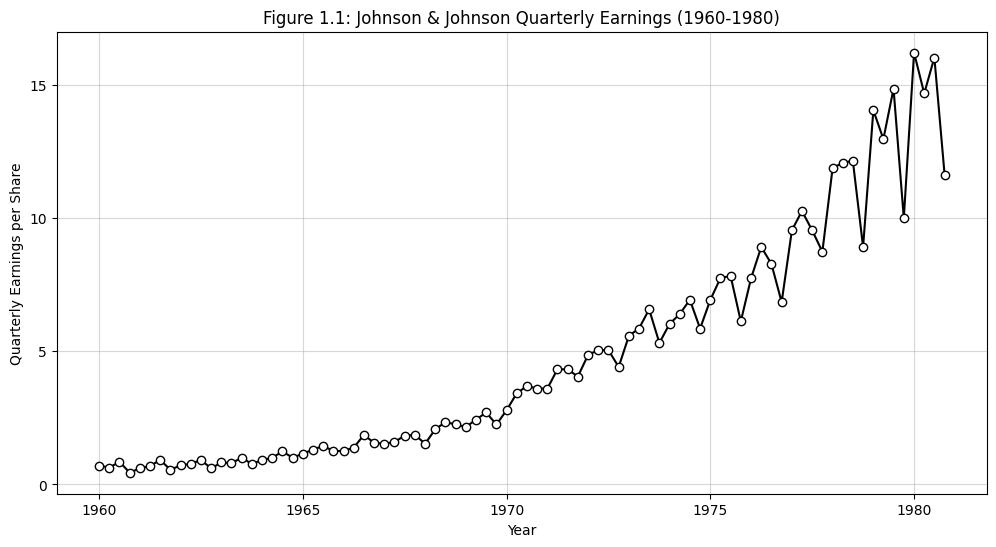

In [4]:
jj['Time'] = pd.PeriodIndex(jj['Time'], freq='Q').to_timestamp()

plt.figure(figsize=(12, 6))  
plt.plot(jj['Time'], jj['Value'], marker='o', linestyle='-',markerfacecolor='white', markeredgecolor='black',color='black')

plt.title("Figure 1.1: Johnson & Johnson Quarterly Earnings (1960-1980)")
plt.ylabel("Quarterly Earnings per Share")
plt.xlabel("Year")

plt.grid(True, alpha=0.5)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gca().yaxis.set_major_locator(MultipleLocator(5))

plt.show()


###  1.2 Yearly average global temperature deviations (1880–2015) in degrees centigrade

In [5]:
data_url = "https://raw.githubusercontent.com/datasets/global-temp/master/data/annual.csv"
 
data = pd.read_csv(data_url)

data_filtered = data[(data['Year'] >= 1880) & (data['Year'] <= 2015)]

data_filtered.head(8)

,Source,Year,Mean
30,GISTEMP,1880,-0.1725
31,gcag,1880,-0.3158
32,GISTEMP,1881,-0.0883
33,gcag,1881,-0.2322
34,GISTEMP,1882,-0.1067
35,gcag,1882,-0.2955
36,GISTEMP,1883,-0.1742
37,gcag,1883,-0.3465


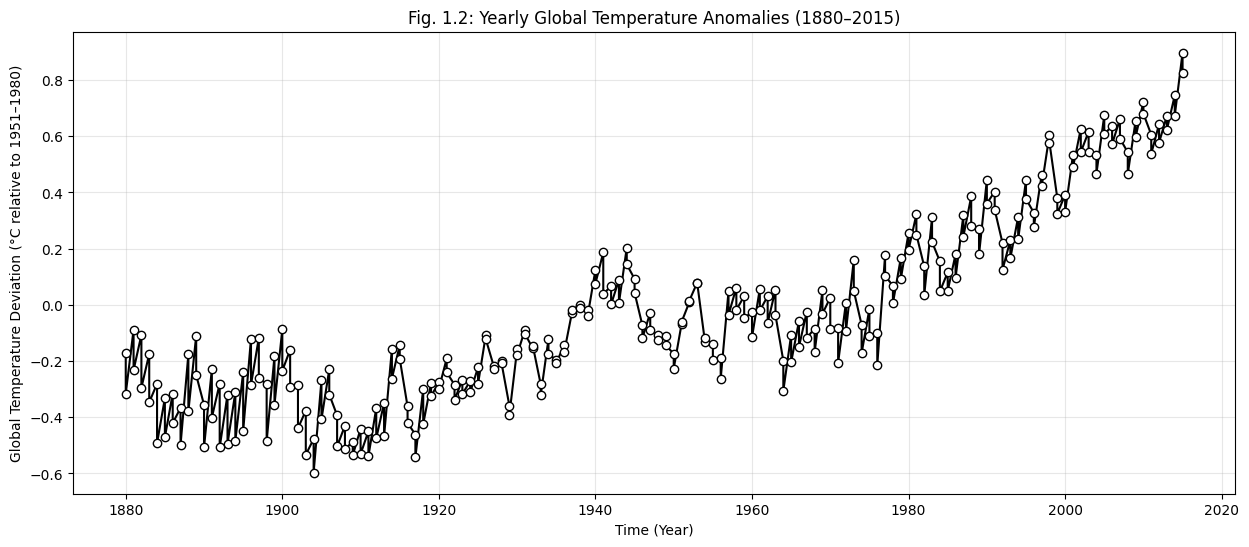

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(data_filtered["Year"], data_filtered["Mean"], marker='o', linestyle='-', markeredgecolor='black',color='black', markerfacecolor='white' )

plt.title('Fig. 1.2: Yearly Global Temperature Anomalies (1880–2015)')
plt.xlabel('Time (Year)')
plt.ylabel('Global Temperature Deviation (°C relative to 1951–1980)')

plt.grid(True, alpha=0.3)

plt.show()


### 1.3. Speech recording of the syllable aaa ··· hhh sampled at 10,000 points per second with n = 1020 points.

In [7]:
speech = astsa.load_speech()

speech.head(8)  

,Time,Value
0,1,1814
1,2,1556
2,3,1442
3,4,1416
4,5,1352
5,6,1154
6,7,974
7,8,962


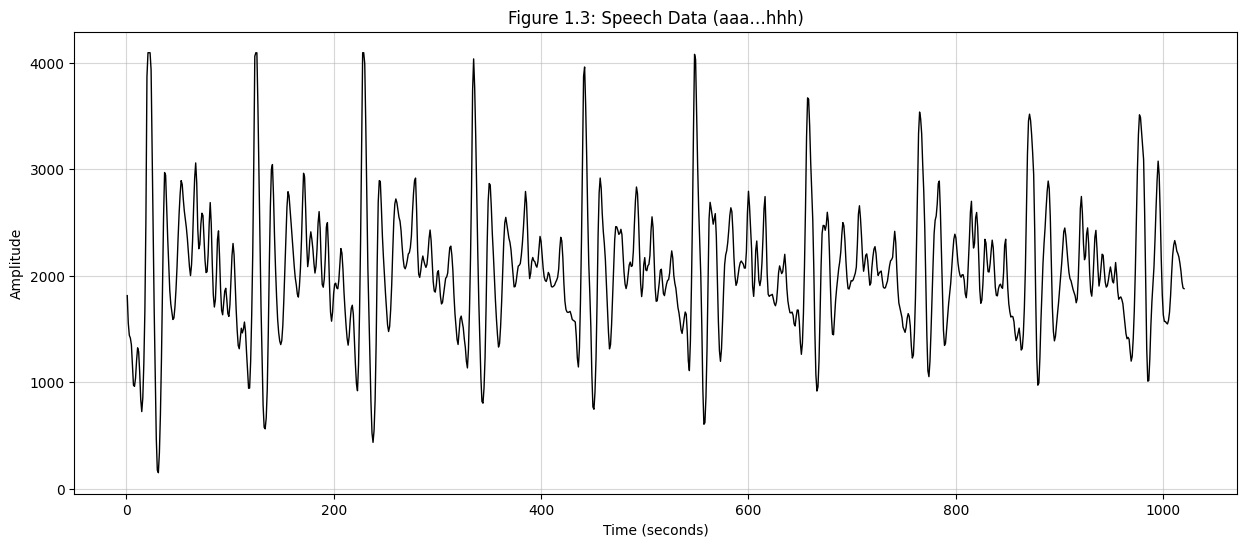

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(speech["Time"], speech["Value"], color="black", linewidth=1)

plt.title("Figure 1.3: Speech Data (aaa…hhh)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

plt.grid(True, alpha=0.5)
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

plt.show()

### 1.4 The daily returns of the Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016.

In [3]:
djia = astsa.load_djia()

djia.head(8)


,Date,Open,High,Low,Close,Volume
0,2006-04-20,11278.530273,11384.110352,11275.049805,11342.889648,336420000.0
1,2006-04-21,11343.450195,11405.879883,11316.790039,11347.450195,325090000.0
2,2006-04-24,11346.809570,11359.700195,11305.830078,11336.320312,232000000.0
3,2006-04-25,11336.559570,11355.370117,11260.839844,11283.250000,289230000.0
4,2006-04-26,11283.250000,11379.870117,11282.769531,11354.490234,270270000.0
5,2006-04-27,11349.530273,11416.929688,11275.299805,11382.509766,361740000.0
6,2006-04-28,11358.330078,11417.660156,11347.209961,11367.139648,738440000.0
7,2006-05-01,11367.780273,11428.370117,11329.440430,11343.290039,365970000.0


In [6]:
returns = np.diff(np.log(djia["Close"]))

# Corresponding dates (drop first date)
dates = djia["Date"].iloc[1:]
dates.head(8)

1    2006-04-21
2    2006-04-24
3    2006-04-25
4    2006-04-26
5    2006-04-27
6    2006-04-28
7    2006-05-01
8    2006-05-02
Name: Date, dtype: object

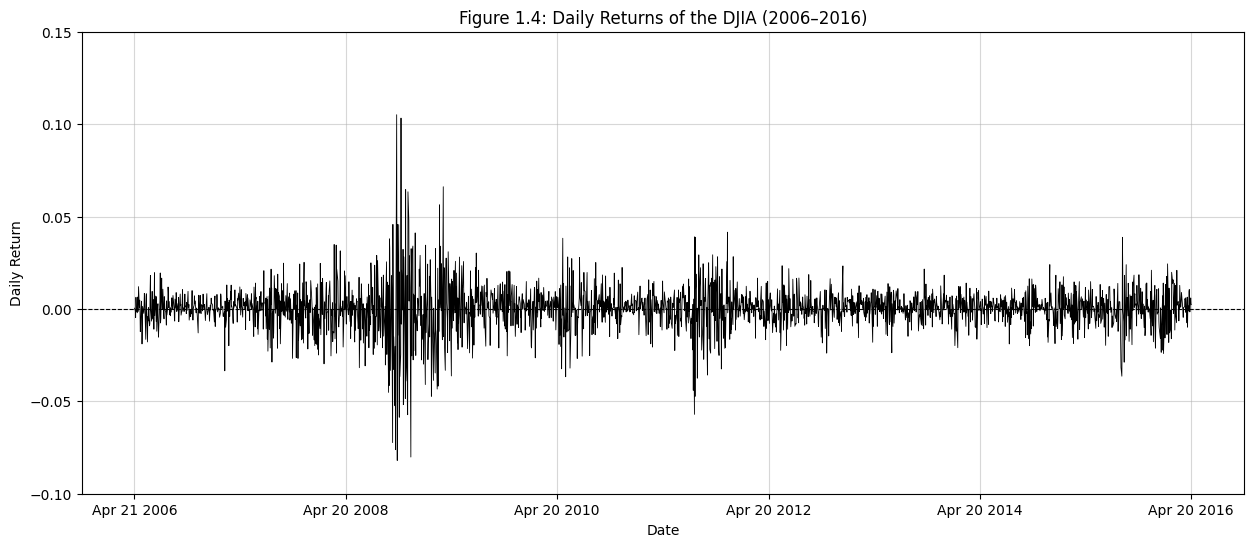

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dates, returns, color="black", lw=0.6)

plt.title("Figure 1.4: Daily Returns of the DJIA (2006–2016)")
plt.xlabel("Date")
plt.ylabel("Daily Return")

plt.xticks(
    pd.date_range(dates.min(), dates.max(), periods=6),
    pd.date_range(dates.min(), dates.max(), periods=6).strftime("%b %d %Y")
)

ylim = np.floor(returns.min()/0.05)*0.05, np.ceil(returns.max()/0.05)*0.05
plt.ylim(*ylim)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

plt.axhline(0, color="black", ls="--", lw=0.8)
plt.grid(alpha=0.5)
plt.show()
